# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from pylab import rcParams

In [2]:
df = pd.read_csv(r'C:\Users\Артем\New_Jupyter\Sber_DA\data\test_cluster.csv', encoding='cp1251', sep=';')

In [3]:
df_1 = df

In [4]:
#df_1.info()

# Кластеризация

In [5]:
# прописываем флаги. 

# ипотека
df_1['flag_ml_balance'] = np.where(df_1['ml_balance'] != 0, 1, 0)
# потреб кредит
df_1['flag_cl_balance'] = np.where(df_1['cl_balance_0m'] != 0, 1, 0)
# все кредиты
df_1['flag_loan_balance'] = np.where(df_1['loan_balance_0m'] != 0, 1, 0)
# депозит
df_1['flag_td_balance'] = np.where(df_1['td_balance_0m'] != 0, 1, 0)

In [6]:
# кластеризация клиентов по возрастным группам
def age_gr(x):
    if x <= 30:
        return 'junior'
    elif 31 <= x < 50:
        return 'pre_middle'
    elif 51 <= x < 70:
        return 'middle'
    elif 70 <= x:
        return 'senior'

df_1['age_group'] = df_1.age.apply(lambda x: age_gr(x))

In [7]:
def full_year_gr(x):
    if x <= 60:
        return '5_years'
    elif 61 <= x < 121:
        return '10_years'
    elif 121 <= x < 181:
        return '15_years'
    else:
        return '15_+_years'

df_1['full_year_gr'] = df_1.full_mob.apply(lambda x: full_year_gr(x))

In [8]:
# для сортировки городов по размеру 
def city_size(x):
    if x == '<100':
        return 1
    elif x == '100-500':
        return 2
    elif x == '500-1000':
        return 3
    elif x == 'Mega':
        return 4  
    else:
        return 5

df_1['city_size'] = df_1.city_type.apply(lambda x: city_size(x))

# Распределение кол-ва клиентов по возрастной группе

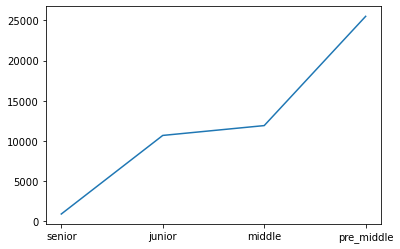

In [9]:
df_age_group = df_1.groupby('age_group', as_index=False)\
                    .agg({'age':'count'})\
                    .rename(columns={'age':'qty'})\
                    .sort_values('qty', ascending=True)

df_age_group.set_index("age_group", inplace=True)
#df_age_group

plt.plot(df_age_group);

# Распределение кол-ва клиентов по длит-и взаимоотношений с банком

In [10]:
df_full_year_gr = df_1.groupby('full_year_gr', as_index=False)\
                    .agg({'age':'count'})\
                    .rename(columns={'age':'qty'})

df_full_year_gr.set_index("full_year_gr", inplace=True)
#df_full_year_gr

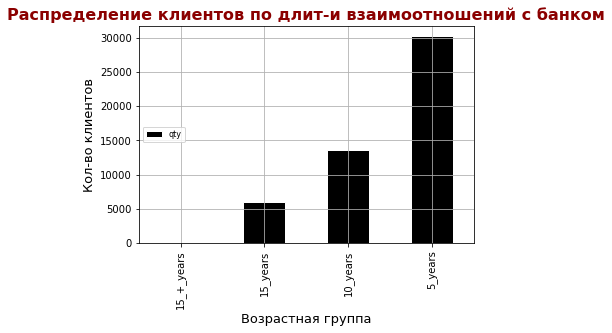

In [11]:
rcParams['figure.figsize'] = 6,4
df_full_year_gr.sort_values('qty', ascending=True).plot(kind='bar', ec='white', color='black')
plt.title('Распределение клиентов по длит-и взаимоотношений с банком'
          ,fontsize=16
          ,fontweight='bold'
          ,loc = 'center'
          ,color='DarkRed')
plt.xlabel('Возрастная группа' ,fontsize = 13)
plt.ylabel('Кол-во клиентов' ,fontsize = 13)
plt.legend(loc='center left', fontsize = 8)
plt.grid()
#plt.grid(axis='x')
plt.show()

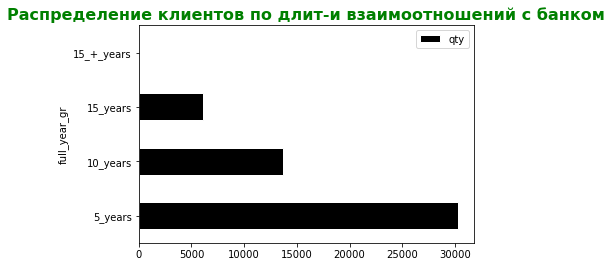

In [12]:
rcParams['figure.figsize'] = 6,4
df_full_year_gr.sort_values('qty', ascending=False).plot(kind='barh', ec='white', color='black')
plt.title('Распределение клиентов по длит-и взаимоотношений с банком', fontsize=16, fontweight='bold', loc = 'center', color='Green')
plt.show()

# Обработка DataFrame

In [13]:
df_2 = df.groupby(['age' ,'gender' ,'city_type' ,'city_size' ,'age_group' ,'full_year_gr'
                    ,'flag_ml_balance' ,'flag_cl_balance' ,'flag_loan_balance' ,'flag_td_balance']
                    ,as_index=False)\
            .agg({'avg_cl_balance_1Y':'count', 'income':'sum', 'dc_trx_sum':'mean'})\
            .rename(columns={'avg_cl_balance_1Y':'qty_clients', 'income':'income', 'dc_trx_sum': 'cards'
                            ,'flag_ml_balance':'flag_ipoteka', 'flag_cl_balance':'flag_potreb_loan'
                            ,'flag_loan_balance': 'flag_all_loans', 'flag_td_balance': 'flag_deposit'})\
            .sort_values('city_size', ascending=True)
df_2.head(3)

,age,gender,city_type,city_size,age_group,full_year_gr,flag_ipoteka,flag_potreb_loan,flag_all_loans,flag_deposit,qty_clients,income,cards
5296,98,М,<100,1,senior,15_years,0,0,0,0,1,3822.560,0.000000
3282,53,F,<100,1,middle,15_years,0,1,1,0,13,189965.000,876.923077
3283,53,F,<100,1,middle,5_years,0,0,0,0,58,772834.925,132964.040874


In [14]:
#метод melt переводит широкий df в длинный формат
#var_name = id_vars; value_name = значения указанных полей  в id_vars
df_2_long = pd.melt(df_2, var_name = 'Item', value_name = 'Sales',
            id_vars=['gender' ,'city_type' , 'city_size','age_group' ,'full_year_gr', 'flag_ipoteka' ,'flag_potreb_loan' ,'flag_all_loans' ,'flag_deposit', 'qty_clients'])
df_2_long.shape
#sample выдаёт рандомную выборку
df_2_long.sample(n=5) 

,gender,city_type,city_size,age_group,full_year_gr,flag_ipoteka,flag_potreb_loan,flag_all_loans,flag_deposit,qty_clients,Item,Sales
11030,F,<100,1,pre_middle,10_years,1,0,1,0,1,cards,0.00
8211,М,500-1000,3,pre_middle,15_years,0,0,1,0,1,income,0.00
14602,М,Mega,4,pre_middle,15_years,0,0,0,0,6,cards,0.00
9997,М,1M+,5,pre_middle,10_years,0,0,1,0,5,income,101601.52
1801,М,100-500,2,pre_middle,10_years,0,0,1,1,1,age,49.00


# Распределение сред суммы трат по картам по возрастным группам и гендеру

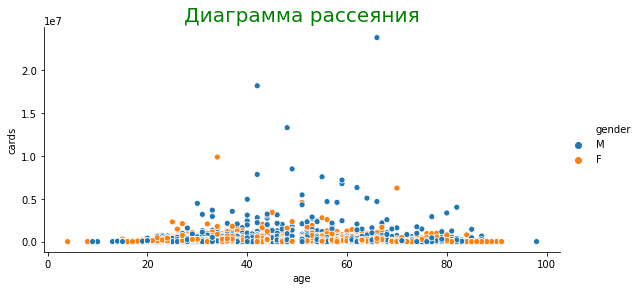

In [15]:
sns.relplot(x = 'age' ,y = 'cards' ,data = df_2 ,hue='gender', kind = 'scatter', height= 4, aspect = 2)
plt.title('Диаграмма рассеяния', size=20, color='g');

# Распределение кол-ва клиентов возрастой группе и длительности взаимоотношений с банком

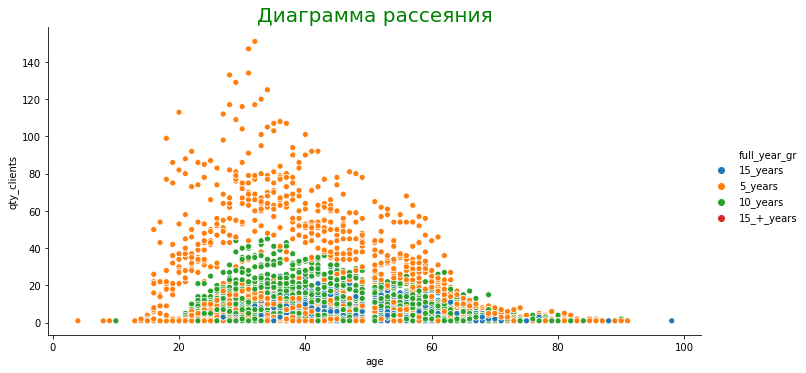

In [16]:
sns.relplot(x = 'age' ,y = 'qty_clients' ,data = df_2 ,hue = 'full_year_gr' ,kind = 'scatter'
            ,height= 5, aspect = 2)
plt.title('Диаграмма рассеяния', size=20, color='g');
# Чемс тарше , тем дольше клиенты сотрудничают с банком

# Распределение доход по возрасту и гендеру

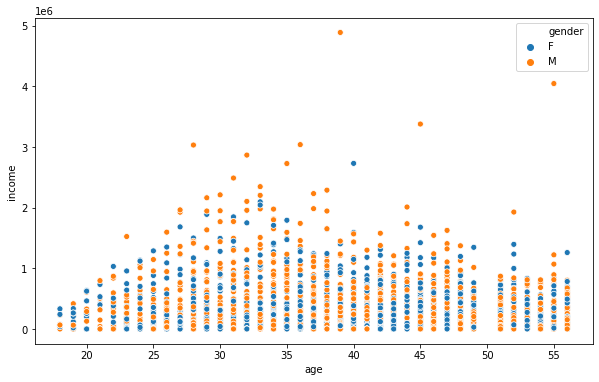

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_2.query('age >= 18 & age <= 56'), x = 'age', y = 'income' ,hue = 'gender');
# Пик дохода приходится на вощрастную группу 30 - 40 лет

# Распределение дохода по размерам городов и гендеру

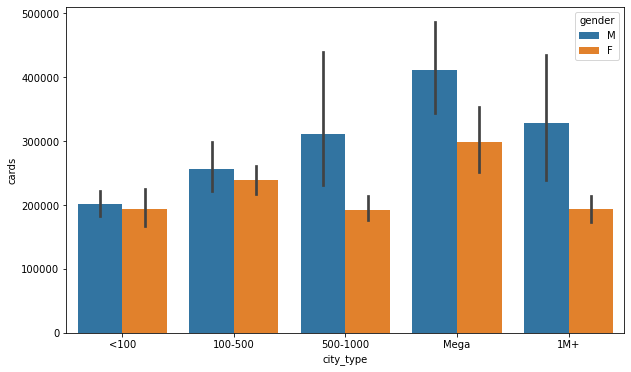

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_2, x = 'city_type', y = 'cards' ,hue = 'gender');
# Наибольший доход у мужчине в "Мегаполисах"

# Распределение сред суммы трат по картам по размерам городов и длительность взаимоотношений с банком

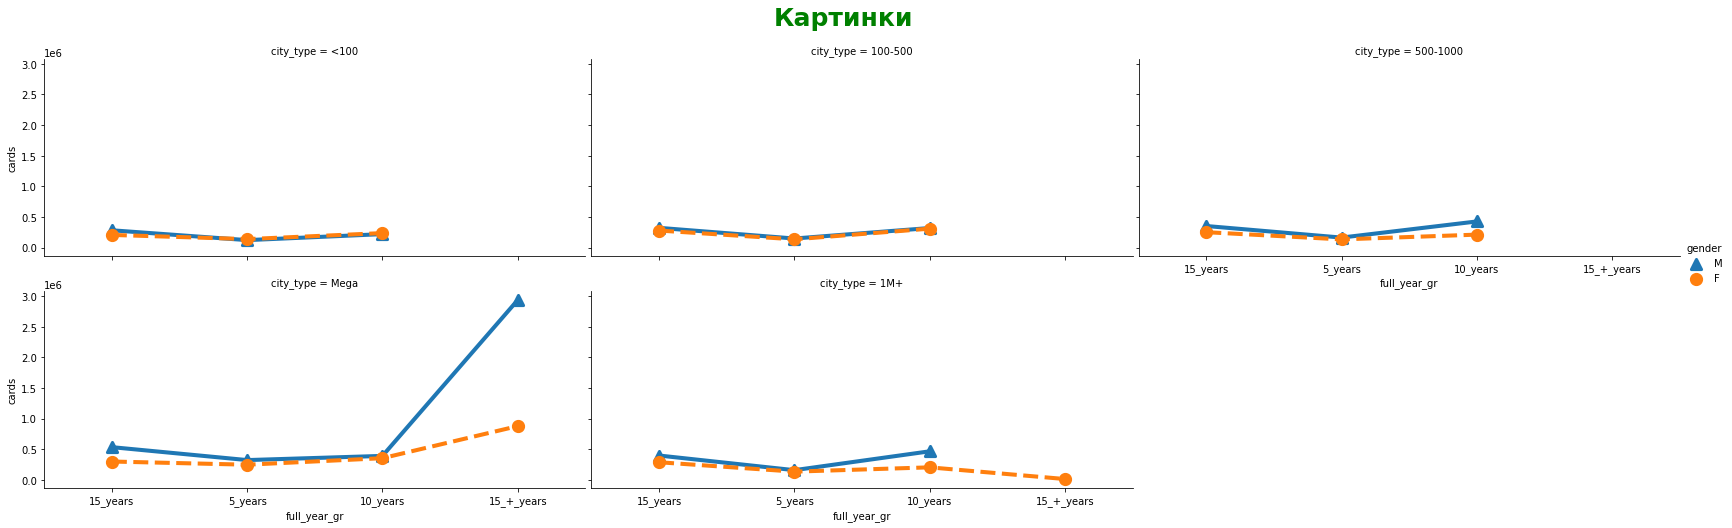

In [19]:
sns.catplot(
    x = 'full_year_gr', 
    y = 'cards', 
    data = df_2, 
    kind = 'point', 
    hue = 'gender',
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col = 'city_type',
    # сколько графиков в строке
    col_wrap=3,
    height=4, 
    aspect=2,
    # размер линий
    scale=1.5)
plt.suptitle("Картинки", size=25, color='g', weight='bold')
plt.tight_layout(pad = 5,w_pad = 0.25, h_pad = 0.25);